In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

data_path = r'E:\Projects\Chess\Lichess_data\stockfish\\'
all_features_path = data_path+'all_features\\top_all_features.pickle'

In [2]:
# Считываем вычисленные характеристики и разделяем
# их на тренировочную и тестовую выборки
X = pd.read_pickle(all_features_path)
X

,0,1,2,3,4,5,6,7,8,9,...,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202
0,7.0,0.0,0.0,14.0,36.0,1.0,1.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,0.0,20.0,30.0,0.0,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0.0,0.0,18.0,0.0,0.0,1.0,0.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,0.0,18.0,58.0,0.0,1.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,0.0,12.0,19.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,14.0,0.0,0.0,13.0,0.0,2.0,1.0,2.0,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21538,6.0,0.0,0.0,14.0,0.0,1.0,1.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21539,9.0,0.0,0.0,12.0,0.0,1.0,1.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
21540,13.0,0.0,0.0,19.0,0.0,1.0,1.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
with open(data_path+'top_data.pickle', 'rb') as f:
    data = pd.read_pickle(f)
data

,ELO_white,ELO_black,Result,ECO,Opening,UTCDate,TimeControl,Termination
0,2479.0,2481.0,1.0,B06,Modern Defense: Two Knights Variation,2014-01-15,bullet,Normal
1,2508.0,2454.0,1.0,B08,Pirc Defense: Classical Variation,2014-01-15,bullet,Normal
2,2442.0,2520.0,0.0,C11,French Defense: Steinitz Variation,2014-01-15,bullet,Time forfeit
3,2531.0,2431.0,1.0,B07,Pirc Defense #4,2014-01-15,bullet,Normal
4,2422.0,2542.0,1.0,E20,Nimzo-Indian Defense,2014-01-15,bullet,Normal
...,...,...,...,...,...,...,...,...
21537,2662.0,2762.0,0.5,C26,Vienna Game: Mieses Variation,2016-06-29,blitz,Normal
21538,2679.0,2744.0,1.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal
21539,2436.0,2433.0,0.0,A15,"English Opening: Anglo-Indian Defense, King's ...",2016-06-29,blitz,Normal
21540,2454.0,2524.0,0.0,C42,Russian Game: Three Knights Game,2016-06-29,blitz,Normal


In [4]:
mean_elos = (data.ELO_white + data.ELO_black) / 2
elo_difference = data.ELO_white - data.ELO_black

In [5]:
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = train_test_split(X, mean_elos, test_size=0.2)
X_train_diff, X_test_diff, Y_train_diff, Y_test_diff = train_test_split(X, elo_difference, test_size=0.2)

<font size=6>ElasticNet</font><br>
Работает медленнее чем ElasticNetCV, резальтуты чуть хуже чем ElasticNetCV.
Поэтому решено отказаться от дальнейшего рассмотрения обычной версии ElasticNet.

In [6]:
from sklearn.linear_model import ElasticNet

elastic_mean_model = ElasticNet()
elastic_mean_model.fit(X_train_mean, Y_train_mean)
elastic_mean_pred = elastic_mean_model.predict(X_test_mean)
print(mean_absolute_percentage_error(elastic_mean_pred, Y_test_mean))

0.02969207383943848


e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+07, tolerance: 1.599e+04
  model = cd_fast.enet_coordinate_descent(


In [7]:
elastic_diff_model = ElasticNet()
elastic_diff_model.fit(X_train_diff, Y_train_diff)
elastic_diff_pred = elastic_diff_model.predict(X_test_diff)
print(mean_absolute_percentage_error(elastic_diff_pred, Y_test_diff))

217.7373604556206


e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+08, tolerance: 3.872e+04
  model = cd_fast.enet_coordinate_descent(


<font size=6>ElasticNetCV for mean values

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV

# Эластичная  модель с итеративной подгонкой вдоль пути регуляризации.
# Предсказываем среднее значение ELO (между белыми и черными)
elasticCV_mean_model = ElasticNetCV(max_iter=5000, n_jobs=-1)
elasticCV_mean_model.fit(X_train_mean, Y_train_mean)
elasticCV_mean_pred = elasticCV_mean_model.predict(X_test_mean)
print(mean_absolute_percentage_error(elasticCV_mean_pred, Y_test_mean))

e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13159.087333783507, tolerance: 12729.8088231051
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15453.109304323792, tolerance: 12872.914111906144
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15209.367743209004, tolerance: 12729.8088231051
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

0.029709369257444492


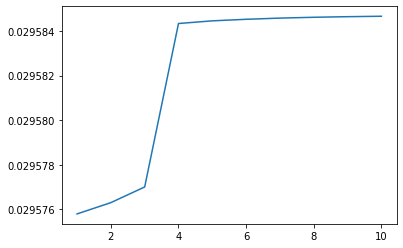

In [56]:
# l1_ratio - float значение от 0 до 1, являющееся коэффициентом, влияющим на l1 и l2
if os.path.exists(r'E:\Projects\Chess\lichess\models\elasticCV_mean.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\elasticCV_mean.pickle','rb') as f:
        res_elasticCV = pickle.load(f)
else:
    res_elasticCV = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for l in range(1, 11):
        elasticCV_mean_model = ElasticNetCV(max_iter=5000, l1_ratio=l/10, n_jobs=-1)
        elasticCV_mean_model.fit(X_train, Y_train)
        elasticCV_mean_pred = elasticCV_mean_model.predict(X_test)
        res_elasticCV[l] = mean_absolute_percentage_error(elasticCV_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\elasticCV_mean.pickle','wb') as f:
        pickle.dump(res_elasticCV, f)
plt.plot(res_elasticCV.keys(),res_elasticCV.values())

In [57]:
elasticCV_mean_model2 = ElasticNetCV(max_iter=5000, l1_ratio=1, n_jobs=-1)
elasticCV_mean_model2.fit(X_train_mean, Y_train_mean)
elasticCV_mean_pred2 = elasticCV_mean_model2.predict(X_test_mean)
mean_absolute_percentage_error(elasticCV_mean_pred2, Y_test_mean)

e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18844.199456602335, tolerance: 12872.914111906144
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75906.10582010448, tolerance: 12873.497166364428
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23231.868899062276, tolerance: 12660.042257661757
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWa

0.029709823974232472

Отличия появляются только в 8 знаке после запятой. И то у "обычной" модели результат лучше.

<font size=6>ElasticNetCV for diff values

In [58]:
elasticCV_diff_model = ElasticNetCV(max_iter=5000, n_jobs=-1)
elasticCV_diff_model.fit(X_train_diff, Y_train_diff)
elasticCV_diff_pred = elasticCV_diff_model.predict(X_test_diff)
print(mean_absolute_percentage_error(elasticCV_diff_pred, Y_test_diff))

163.45567129357502


In [59]:
res_elasticCV = {}
X_train, X_test, Y_train, Y_test = train_test_split(X, elo_difference, test_size=0.2, random_state=42)
for l in range(1, 11):
    elasticCV_diff_model = ElasticNetCV(max_iter=5000, l1_ratio=l/10, n_jobs=-1)
    elasticCV_diff_model.fit(X_train, Y_train)
    elasticCV_diff_pred = elasticCV_diff_model.predict(X_test)
    res_elasticCV[l] = mean_absolute_percentage_error(elasticCV_diff_pred, Y_test)
res_elasticCV

e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34030.153940975666, tolerance: 31022.787689373275
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40545.21436345577, tolerance: 31022.787689373275
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36484.08992737532, tolerance: 31022.787689373275
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWar

{1: 10232.75771640752,
 2: 10232.75771640752,
 3: 10232.75771640752,
 4: 10232.75771640752,
 5: 10232.75771640752,
 6: 10232.75771640752,
 7: 10232.75771640752,
 8: 10232.75771640752,
 9: 10232.75771640752,
 10: 10232.75771640752}

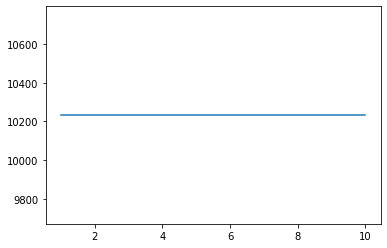

In [60]:
plt.plot(res_elasticCV.keys(),res_elasticCV.values())

In [61]:
elasticCV_diff_model2 = ElasticNetCV(max_iter=5000, l1_ratio=1, n_jobs=-1)
elasticCV_diff_model2.fit(X_train_diff, Y_train_diff)
elasticCV_diff_pred2 = elasticCV_diff_model2.predict(X_test_diff)
print(mean_absolute_percentage_error(elasticCV_diff_pred2, Y_test_diff))

e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56213.940988361835, tolerance: 31077.99801874366
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109051.71957594156, tolerance: 31077.99801874366
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117135.46924650669, tolerance: 31077.99801874366
  model = cd_fast.enet_coordinate_descent_gram(
e:\Programs\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarn

163.45567129357502


Тот же результат, что и для mean-модели

<font size =6>RandomForest mean

In [15]:
rf_mean = RandomForestRegressor(n_jobs=-1)
rf_mean.fit(X_train_mean, Y_train_mean)
rf_mean_pred = rf_mean.predict(X_test_mean)
mean_absolute_percentage_error(rf_mean_pred, Y_test_mean)

0.029919076868383975

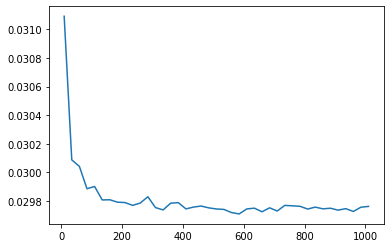

In [16]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_estimators.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_estimators.pickle','rb') as f:
        rf_estimators = pickle.load(f)
else:
    rf_estimators = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for n in range(10,1020,25):
        rf_mean = RandomForestRegressor(n_estimators=n, n_jobs=-1)
        rf_mean.fit(X_train, Y_train)
        rf_mean_pred = rf_mean.predict(X_test)
        rf_estimators[n] = mean_absolute_percentage_error(rf_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\rf_estimators.pickle','wb') as f:
        pickle.dump(rf_estimators, f)
plt.plot(rf_estimators.keys(),rf_estimators.values())

In [17]:
val = list(rf_estimators.values())
val.sort()
minimals = val[:5]
minimals

[0.029709700736344265,
 0.02971901831667429,
 0.02972480011725303,
 0.02972700493310127,
 0.029729952517599932]

In [18]:
minimal_indexes = []
for m in minimals:
    minimal_indexes.append(list(rf_estimators.keys())[list(rf_estimators.values()).index(m)])
minimal_indexes

[585, 560, 660, 960, 710]

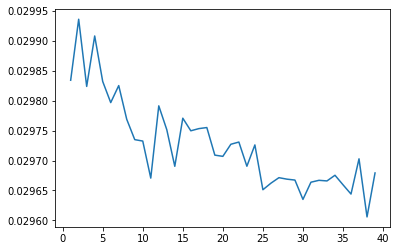

In [19]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_min_samples_leaf.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_min_samples_leaf.pickle','rb') as f:
        rf_min_samples_leaf = pickle.load(f)
else:
    rf_min_samples_leaf = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for n in range(1, 40):
        rf_mean = RandomForestRegressor(min_samples_leaf=n, n_jobs=-1)
        rf_mean.fit(X_train, Y_train)
        rf_mean_pred = rf_mean.predict(X_test)
        rf_min_samples_leaf[n] = mean_absolute_percentage_error(rf_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\rf_min_samples_leaf.pickle','wb') as f:
        pickle.dump(rf_min_samples_leaf, f)
plt.plot(rf_min_samples_leaf.keys(),rf_min_samples_leaf.values())

In [20]:
val = list(rf_min_samples_leaf.values())
val.sort()
minimals2 = val[:5]
minimals2

[0.029605836030485888,
 0.029635106864764886,
 0.029644068990641224,
 0.029651269326318185,
 0.029659594137699957]

In [21]:
minimal_indexes2 = []
for m in minimals2:
    minimal_indexes2.append(list(rf_min_samples_leaf.keys())[list(rf_min_samples_leaf.values()).index(m)])
minimal_indexes2

[38, 30, 36, 25, 35]

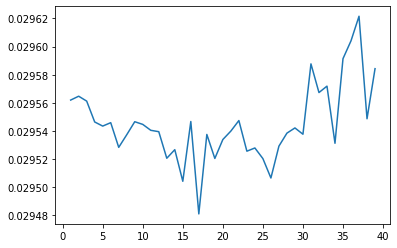

In [22]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_max_depth.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_max_depth.pickle','rb') as f:
        rf_max_depth = pickle.load(f)
else:
    rf_max_depth = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for n in range(1, 40):
        rf_mean = RandomForestRegressor(max_depth=n, n_jobs=-1)
        rf_mean.fit(X_train, Y_train)
        rf_mean_pred = rf_mean.predict(X_test)
        rf_max_depth[n] = mean_absolute_percentage_error(rf_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\rf_max_depth.pickle','wb') as f:
        pickle.dump(rf_max_depth, f)
plt.plot(rf_max_depth.keys(),rf_max_depth.values())

In [23]:
val = list(rf_max_depth.values())
val.sort()
minimals3 = val[:5]
minimals3

[0.02948096876868705,
 0.02950418029273923,
 0.02950651637429509,
 0.029520313279517228,
 0.029520421071172764]

In [24]:
minimal_indexes3 = []
for m in minimals3:
    minimal_indexes3.append(list(rf_max_depth.keys())[list(rf_max_depth.values()).index(m)])
minimal_indexes3

[17, 15, 26, 25, 19]

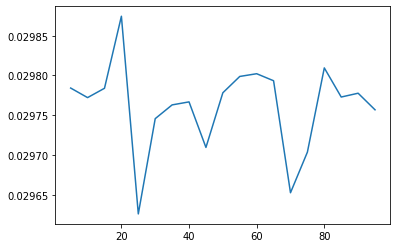

In [25]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_max_features.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_max_features.pickle','rb') as f:
        rf_max_features = pickle.load(f)
else:
    rf_max_features = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for n in range(5, 100, 5):
        rf_mean = RandomForestRegressor(max_features=n, n_jobs=-1)
        rf_mean.fit(X_train, Y_train)
        rf_mean_pred = rf_mean.predict(X_test)
        rf_max_features[n] = mean_absolute_percentage_error(rf_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\rf_max_features.pickle','wb') as f:
        pickle.dump(rf_max_features, f)
plt.plot(rf_max_features.keys(),rf_max_features.values())

In [26]:
val = list(rf_max_features.values())
val.sort()
minimals4 = val[:5]
minimals4

[0.029625860754918833,
 0.029652495499980537,
 0.02970358873759574,
 0.029709496208664404,
 0.029745693341901077]

In [27]:
minimal_indexes4 = []
for m in minimals4:
    minimal_indexes4.append(list(rf_max_features.keys())[list(rf_max_features.values()).index(m)])
minimal_indexes4

[25, 70, 75, 45, 30]

In [28]:
parameters = {'n_estimators': minimal_indexes, 'min_samples_leaf': minimal_indexes2,
    'max_depth': minimal_indexes3, 'max_features': minimal_indexes4}
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_res.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_res.pickle','rb') as f:
        rf_res = pickle.load(f)
else:
    rf_res = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
    for i in minimal_indexes[:2]:
        for j in minimal_indexes2[:2]:
            for k in minimal_indexes3[:2]:
                for l in minimal_indexes4[:2]:
                    rf_mean = RandomForestRegressor(n_estimators=i, min_samples_leaf=j,
                        max_depth=k, max_features=l, n_jobs=-1)
                    rf_mean.fit(X_train, Y_train)
                    rf_mean_pred = rf_mean.predict(X_test)
                    rf_res[i,j,k,l] = mean_absolute_percentage_error(rf_mean_pred, Y_test)
                    with open(r'E:\Projects\Chess\lichess\models\rf_res.pickle','wb') as f:
                        pickle.dump(rf_res, f)

In [29]:
print(min(list(rf_res.values())))

0.029561630482066826


Комбинации лучших параметров показали не лучшие результаты. Оптимальным параметром выглядит max_depth=26. При фиксации глубины алгоритм выдает практически такой же результат, работая при этом быстрее.

In [54]:
rf_mean = RandomForestRegressor(max_depth=26, n_jobs=-1)
rf_mean.fit(X_train_mean, Y_train_mean)
rf_mean_pred = rf_mean.predict(X_test_mean)
mean_absolute_percentage_error(rf_mean_pred, Y_test_mean)

0.02967514077695349

<font size =6>RandomForest diff

In [31]:
rf_diff = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rf_diff.fit(X_train_diff, Y_train_diff)
rf_diff_pred = rf_diff.predict(X_test_diff)
mean_absolute_percentage_error(rf_diff_pred, Y_test_diff)

57.50001749979746

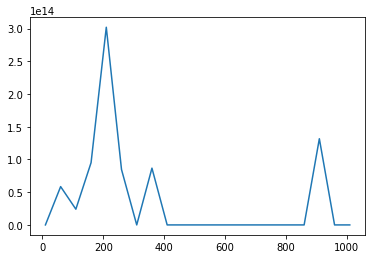

In [62]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\rf_estimators_diff.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\rf_estimators_diff.pickle','rb') as f:
        rf_estimators_diff = pickle.load(f)
else:
    rf_estimators_diff = {}
    X_train, X_test, Y_train, Y_test = train_test_split(X, elo_difference, test_size=0.2, random_state=42)
    for n in range(10,1020,50):
        rf_diff = RandomForestRegressor(n_estimators=n, n_jobs=-1)
        rf_diff.fit(X_train_diff, Y_train_diff)
        rf_diff_pred = rf_diff.predict(X_test_diff)
        rf_estimators_diff[n] = mean_absolute_percentage_error(rf_diff_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\rf_estimators_diff.pickle','wb') as f:
        pickle.dump(rf_estimators_diff, f)
plt.plot(rf_estimators_diff.keys(),rf_estimators_diff.values())

In [63]:
val = list(rf_estimators_diff.values())
val.sort()
minimals7 = val[:5]
minimals7

[11.989702027212616,
 42.274391872260956,
 47.495829884492856,
 50.56898337051938,
 51.17297651905436]

In [64]:
minimal_indexes7 = []
for m in minimals7:
    minimal_indexes7.append(list(rf_estimators_diff.keys())[list(rf_estimators_diff.values()).index(m)])
minimal_indexes7

[10, 460, 310, 510, 560]

<font size=6>Градиентный бустинг

In [32]:
from sklearn.ensemble import GradientBoostingRegressor 

gbm_mean = GradientBoostingRegressor()
gbm_mean.fit(X_train_mean, Y_train_mean)
gbm_mean_pred = gbm_mean.predict(X_test_mean)
mean_absolute_percentage_error(gbm_mean_pred, Y_test_mean)

0.029764969149369987

In [33]:
gbm_diff = GradientBoostingRegressor()
gbm_diff.fit(X_train_diff, Y_train_diff)
gbm_diff_pred = gbm_diff.predict(X_test_diff)
mean_absolute_percentage_error(gbm_diff_pred, Y_test_diff)

216.12641502352454

<font size=6>AdaBoost mean and diff

In [34]:
from sklearn.ensemble import AdaBoostRegressor

ada_mean = AdaBoostRegressor()
ada_mean.fit(X_train_mean, Y_train_mean)
ada_mean_pred = ada_mean.predict(X_test_mean)
mean_absolute_percentage_error(ada_mean_pred, Y_test_mean)

0.03487747007842039

In [35]:
ada_mean = AdaBoostRegressor(loss='square')
ada_mean.fit(X_train_mean, Y_train_mean)
ada_mean_pred = ada_mean.predict(X_test_mean)
mean_absolute_percentage_error(ada_mean_pred, Y_test_mean)

0.05137694392621982

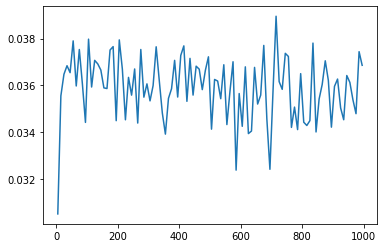

In [36]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\ada_n_estimators.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\ada_n_estimators.pickle','rb') as f:
        ada_n_estimators = pickle.load(f)
else:
    ada_n_estimators = {}
    for n in range(5, 1000, 10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
        ada_mean = AdaBoostRegressor(n_estimators=n)
        ada_mean.fit(X_train, Y_train)
        ada_mean_pred = ada_mean.predict(X_test)
        ada_n_estimators[n] = mean_absolute_percentage_error(ada_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\ada_n_estimators.pickle','wb') as f:
        pickle.dump(ada_n_estimators, f)
plt.plot(ada_n_estimators.keys(),ada_n_estimators.values())

In [37]:
val = list(ada_n_estimators.values())
val.sort()
minimals5 = val[:5]
minimals5

[0.030502229346083494,
 0.03237401121495939,
 0.032409807744022356,
 0.0339135543095289,
 0.033937037566837025]

In [38]:
minimal_indexes5 = []
for m in minimals5:
    minimal_indexes5.append(list(ada_n_estimators.keys())[list(ada_n_estimators.values()).index(m)])
minimal_indexes5

[5, 585, 695, 355, 625]

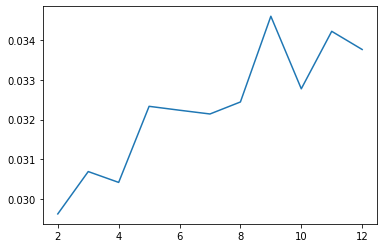

In [39]:
if os.path.exists(r'E:\Projects\Chess\lichess\models\ada_n_estimators2.pickle'):
    with open(r'E:\Projects\Chess\lichess\models\ada_n_estimators2.pickle','rb') as f:
        ada_n_estimators2 = pickle.load(f)
else:
    ada_n_estimators2 = {}
    for n in range(2, 13):
        X_train, X_test, Y_train, Y_test = train_test_split(X, mean_elos, test_size=0.2, random_state=42)
        ada_mean = AdaBoostRegressor(n_estimators=n)
        ada_mean.fit(X_train, Y_train)
        ada_mean_pred = ada_mean.predict(X_test)
        ada_n_estimators2[n] = mean_absolute_percentage_error(ada_mean_pred, Y_test)
    with open(r'E:\Projects\Chess\lichess\models\ada_n_estimators2.pickle','wb') as f:
        pickle.dump(ada_n_estimators2, f)
plt.plot(ada_n_estimators2.keys(),ada_n_estimators2.values())

In [40]:
val = list(ada_n_estimators2.values())
val.sort()
minimals6 = val[:5]
minimals6

[0.029630035299559435,
 0.030421687916386067,
 0.03069406971266796,
 0.03214085923953828,
 0.032235244983676525]

In [41]:
minimal_indexes6 = []
for m in minimals6:
    minimal_indexes6.append(list(ada_n_estimators2.keys())[list(ada_n_estimators2.values()).index(m)])
minimal_indexes6

[2, 4, 3, 7, 6]

In [42]:
from sklearn.ensemble import AdaBoostRegressor

ada_mean = AdaBoostRegressor(n_estimators=2)
ada_mean.fit(X_train_mean, Y_train_mean)
ada_mean_pred = ada_mean.predict(X_test_mean)
mean_absolute_percentage_error(ada_mean_pred, Y_test_mean)

0.029746489472324743

<font size=6>AdaBoost diff

In [43]:
ada_diff = AdaBoostRegressor()
ada_diff.fit(X_train_diff, Y_train_diff)
ada_diff_pred = ada_diff.predict(X_test_diff)
mean_absolute_percentage_error(ada_diff_pred, Y_test_diff)

158.61404788962474

<font size=6>XGB Regressor mean (default)</font>

In [44]:
from xgboost import XGBRegressor
xgb_mean = XGBRegressor()
xgb_mean.fit(X_train_mean, Y_train_mean)
xgb_mean_pred = xgb_mean.predict(X_test_mean)
mean_absolute_percentage_error(xgb_mean_pred, Y_test_mean)

0.030197293952627238

<font size=6>XGB Regressor diff (configured)

In [45]:
xgb_diff = XGBRegressor(max_depth = 4, n_estimators = 250, learning_rate = 0.05)
xgb_diff.fit(X_train_diff, Y_train_diff)
xgb_diff_pred = xgb_diff.predict(X_test_diff)
mean_absolute_percentage_error(xgb_diff_pred, Y_test_diff)

208.68229013667195